In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
from numpy import random
import numpy as np
def generate(Category,x_variable,y_variable):
    conn=sqlite3.connect("Database.db")
    cursor=conn.cursor()
    table_command="""
    Create Table IF NOT EXISTS table_to_plot(Category INTEGER,
    x_variable INTEGER,
    y_variable INTEGER);
    """
    cursor.execute(table_command)
    try: 
        insert_command= """
        Insert INTO table_to_plot(Category,x_variable,y_variable)
        values(?,?,?)
        """
        with conn:                        
            cursor.execute( insert_command,(Category,x_variable,y_variable))
            conn.commit()      
    except sqlite3.Error as e:
        print("Error executing SQL:", e)
    finally:                                   
        if cursor:                             
            cursor.close()
        if conn:
            conn.close()


In [2]:
Category=[random.randint(1,10) for _ in range(1,100)]
x_variable=[random.randint(800,2001) for _ in range(1,100)]
y_variable=[random.randint(800,2001) for _ in range(1,100)]
for cat, x, y in zip(Category,x_variable,y_variable):
    generate(cat,x,y)
print("Success")

Success


In [3]:
conn=sqlite3.connect("Database.db")
select_query="""
Select* from table_to_plot
"""
data=pd.read_sql_query(select_query,conn)
conn.close()
data.to_csv("table_to_plot.csv",index=False)
print("Saved")

Saved


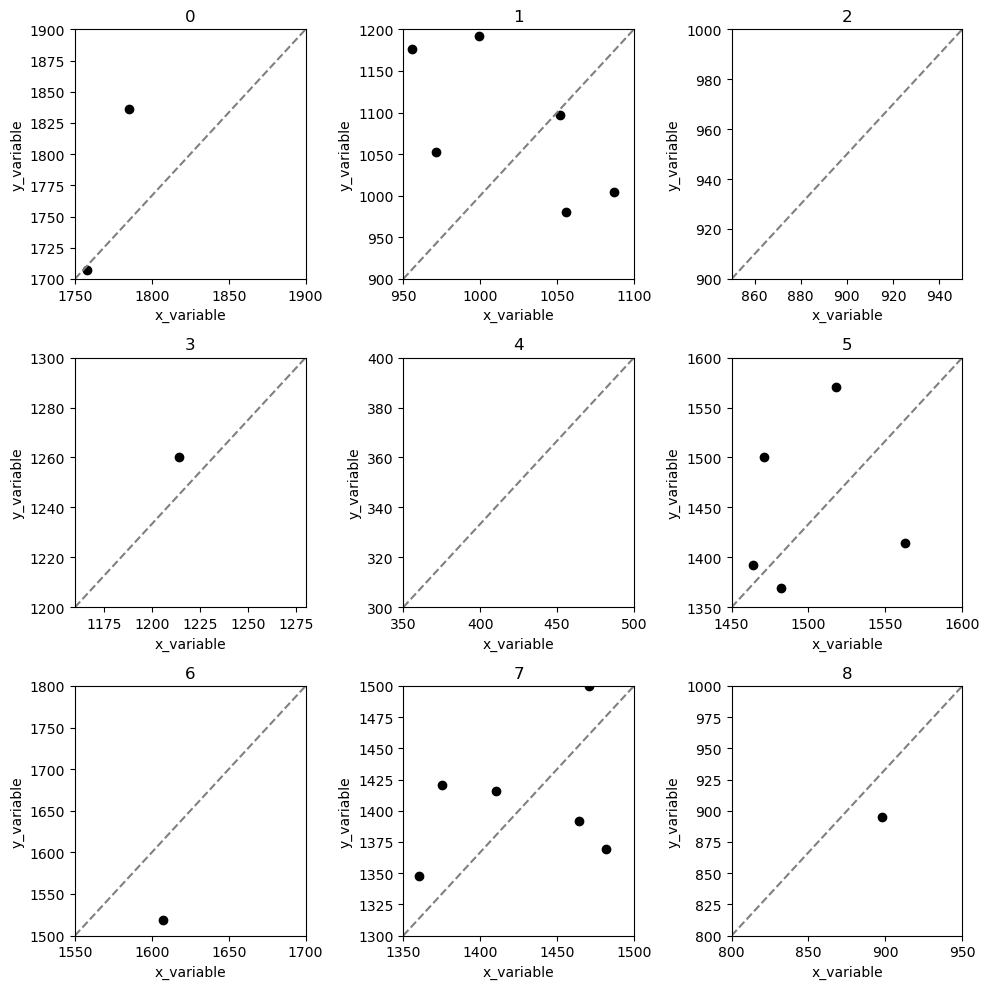

In [5]:
def gen_plot():
    data=pd.read_csv("table_to_plot.csv")
    fig,axes=plt.subplots(3,3,figsize=(10,10))
    ranges=[
        { "x":[1750,1900], "y":[1700,1900]},
         { "x":[950,1100], "y":[900,1200]},
         { "x":[850,950], "y":[900,1000]},
         { "x":[1160,1280], "y":[1200,1300]},
         { "x":[350,500], "y":[300,400]},
         { "x":[1450,1600], "y":[1350,1600]},
         { "x":[1550,1700], "y":[1500,1800]},
         { "x":[1350,1500], "y":[1300,1500]},
         { "x":[800,950], "y":[800,1000]},
    ]
    for i in range(3):
        for j in range(3):
            index=i*3+j
            axes[i,j].set_xlim(ranges[index]["x"])
            axes[i,j].set_ylim(ranges[index]["y"])
            axes[i,j].scatter(data['x_variable'],data['y_variable'],c='black')
            x_line=np.linspace(ranges[index]["x"][0],ranges[index]["x"][1],100)
            y_line=np.linspace(ranges[index]["y"][0],ranges[index]["y"][1],100)
            axes[i,j].plot(x_line,y_line,c='grey',linestyle='--')
            axes[i,j].set_title(f'{index}')
            axes[i,j].set_xlabel('x_variable')
            axes[i,j].set_ylabel('y_variable')
    plt.tight_layout()
    plt.show()
gen_plot()

In [6]:
 def alter():    
    connection=sqlite3.connect("Database_2.db")
    cursor=connection.cursor()
    try:
        cursor.execute("""
        AlTER table table_to_plot add x_range INTEGER
        """)
        cursor.execute("""
        AlTER table table_to_plot add y_range INTEGER
        """)
        cursor.execute("Select Category, x_variable,y_variable from table_to_plot")
        results=cursor.fetchall()
        for row in results:
            Category, x_variable,y_variable=row
            if 800<=x_variable<=1200:
                x_range='[800,1200]'
            elif 1201<=x_variable<=1600:
                x_range='[1201,1600]'
            elif 1601<=x_variable<=2000:
                x_range='[1601,2000]'
                
            if 800<=y_variable<=1200:
                y_range='[800,1200]'
            elif 1201<=y_variable<=1600:
                y_range='[1201,1600]'
            elif 1601<=y_variable<=2000:
                y_range='[1601,2000]'
            cursor.execute("""
              Update table_to_plot
              SET x_range=? ,y_range=?
              where Category=?
              """,(x_range,y_range,Category))
            connection.commit()
    except sqlite3.Error as e:
        print("Error executing SQL:", e)
    finally:                                   
        if cursor:                             
            cursor.close()
        if connection:
            connection.close()

alter()            

In [7]:
conn=sqlite3.connect("Database_2.db")
select_query="""
Select* from table_to_plot
"""
data=pd.read_sql_query(select_query,conn)
conn.close()
data.to_csv("table_to_plot_new.csv",index=False)
print("Saved")

Saved
